# Sharan S
## Assignment 14
## Decision Tree

## Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment_14_Decision tree\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital_Status','Urban'], drop_first=True)
df.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [5]:
#Creating new cols TaxInc and dividing 'Taxable_Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable_Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df=pd.get_dummies(df,columns=['TaxInc'],drop_first=True)


In [7]:
df.tail()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc_Good
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable_Income          600 non-null    int64
 1   City_Population         600 non-null    int64
 2   Work_Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital_Status_Married  600 non-null    uint8
 5   Marital_Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   TaxInc_Good             600 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 17.1 KB


In [9]:
# Normalization
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [10]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0


In [11]:
x=df_norm.drop(['TaxInc_Good'],axis=1)
y=df_norm['TaxInc_Good']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [13]:
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(503.75, 792.75, 'Work_Experience <= 0.817\ngini = 0.327\nsamples = 480\nvalue = [99, 381]\nclass = Good'),
 Text(310.0, 566.25, 'City_Population <= 0.988\ngini = 0.349\nsamples = 373\nvalue = [84, 289]\nclass = Good'),
 Text(155.0, 339.75, 'Work_Experience <= 0.483\ngini = 0.343\nsamples = 369\nvalue = [81, 288]\nclass = Good'),
 Text(77.5, 113.25, 'gini = 0.3\nsamples = 239\nvalue = [44, 195]\nclass = Good'),
 Text(232.5, 113.25, 'gini = 0.407\nsamples = 130\nvalue = [37, 93]\nclass = Good'),
 Text(465.0, 339.75, 'Work_Experience <= 0.483\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Risky'),
 Text(387.5, 113.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Risky'),
 Text(542.5, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(697.5, 566.25, 'Work_Experience <= 0.85\ngini = 0.241\nsamples = 107\nvalue = [15, 92]\nclass = Good'),
 Text(620.0, 339.75, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = Good'),
 Text(775.0, 339.75, 'City_Population

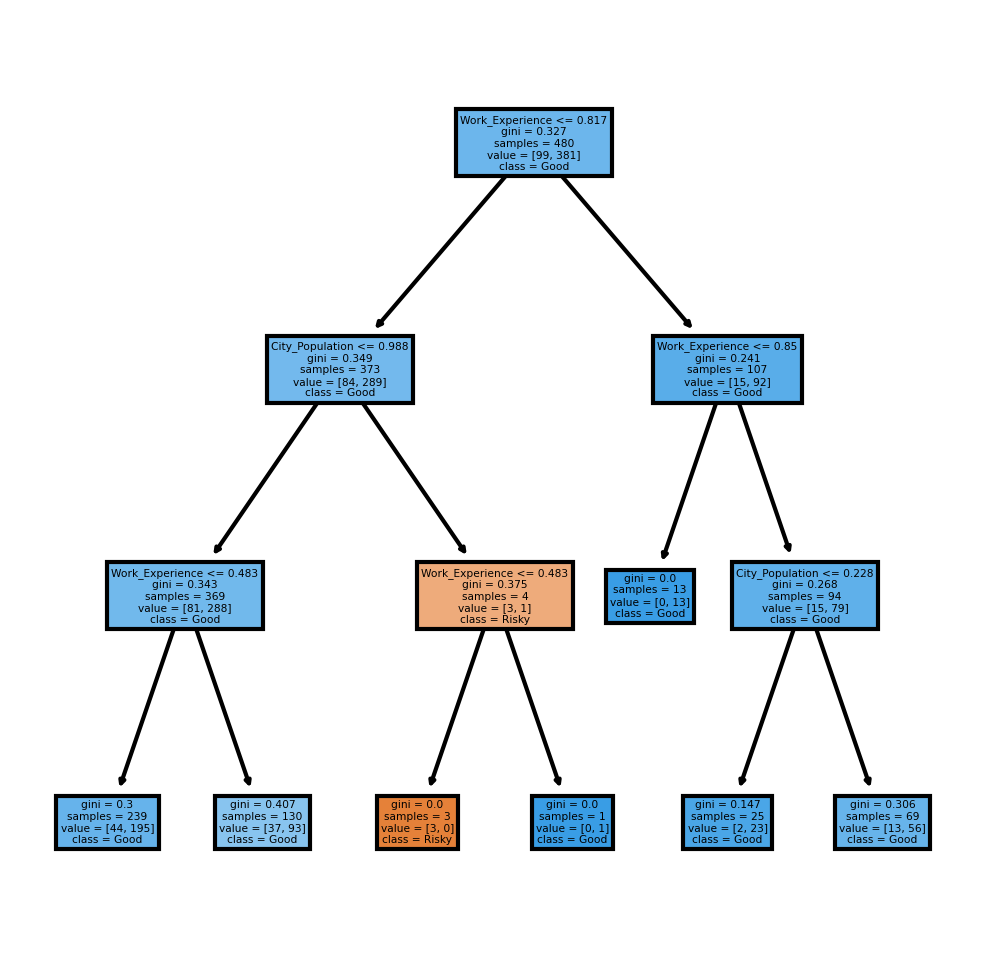

In [14]:
fn=['City_Population','Work_Experience','Undergrad_YES','Marital_Status_Married','Marital_Status_Single','Urban_YES','TaxInc_Good']
cn=['Risky','Good']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [15]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1.0    119
0.0      1
dtype: int64

In [16]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,0,25
1.0,1,94


In [17]:
# Accuracy
np.mean(preds==y_test)

0.7833333333333333